In [11]:
import tensorflow as tf
import datetime
import os

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Reshaping the array to 4D to be compatible withe keras API
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [4]:
# Verify float type
X_train =  X_train.astype('float32')
X_test =  X_test.astype('float32')

In [5]:
# Normalizing the RFB codes by dividing i to the max RGB value
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# import modules and layes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [7]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [8]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
nb_epochs = 10
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x = X_train,y = y_train,epochs = nb_epochs, validation_data = (X_test,y_test),callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0828 - accuracy: 0.9746 - val_loss: 0.0641 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0542 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.0522 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.0473 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0507 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0231 - accuracy: 0.9916 - val_loss: 0.0580 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0502 - val_ac

In [15]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 78363), started 0:21:01 ago. (Use '!kill 78363' to kill it.)

In [29]:
scores = model.evaluate(X_test,y_test)
print("Accuracy = ", scores[1]*100, "%.")

313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9852
Accuracy =  98.51999878883362 %.


In [38]:
predictions = model.predict(X_test)


Prédiction =  9


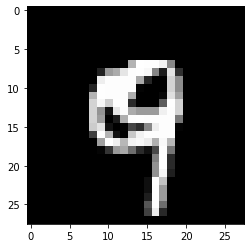

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

img = X_test[4444].reshape((28, 28))
plt.imshow(img,cmap='gray')
pred_4444 = np.argmax(predictions[4444])
print("Prédiction = ", pred_4444)